<a href="https://colab.research.google.com/github/chanhee922/DeepLearning_Practice/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%ED%95%A0_%EC%9D%B4%EB%A1%A0_%EC%A0%95%EB%A6%AC_%EB%B0%8F_%EC%A0%81%EC%9A%A9%ED%95%B4_%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망에 대한 훈련데이터셋의 실전 적용
## - 머신러닝과 딥러닝에서 반드시 알아야 될 부분

1. 전체 데이터셋의 분할  
    - 실전에서 수집 데이터셋의 활용 원칙  
            가. 전체 데이터셋을 3개로 분할 (훈련, 검증, 테스트)
            나. 훈련 데이터 셋 -> 모델의 학습(가중치/절편 업데이트)
            다. 검증 데이터 셋 -> 모델의 튜닝(하이퍼파라미터 조절)
            라. 테스트 데이터 셋 -> 모델의 성능 평가( = 정확도)
                --> 튜닝된 모델의 실전 투입 전 딱 한번 사용
            마. 만일 수집된 전체 데이터 셋이 작을 경우 `교차검증(cross-validation)`을 수행
            바. 실제 데이터 분할은 64:16:20(훈련:검증:테스트)로 함
            

1-0. 훈련 데이터셋 준비

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

((455, 30), (114, 30), (455,), (114,))

1-1. 1단계 분할: 8:2로 훈련:테스트로 분할

In [0]:
from sklearn.model_selection import train_test_split
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x, y, stratify = y, test_size=.2)
x_train_all.shape, x_test_all.shape, y_train_all.shape, y_test_all.shape

((455, 30), (114, 30), (455,), (114,))

1-2. 2단계 분할: 1단계에서 분할된 훈련 데이터 셋을 다시 8:2(훈련:검증)로 분할

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = .2, stratify = y_train_all)
print( x_train.shape, x_val.shape, y_train.shape, y_val.shape )

(364, 30) (91, 30) (364,) (91,)


2-0. 전체 데이터의 전처리(Preprocessing, Munging) 진행  
            --> `표준화`: 특정 변수의 변량을 평균 = 0, 분산 = 1로 변환  
            --> 이유는 R과 동일: 신경망의 핵심 알고리즘(예: 경사하강법)이 변량이 큰 특성에 영향을 크게 받기 때문

In [0]:
# 예제로 30개의 특성중 3/4번째 특성을 박스플롯으로 비교
#   데이터 확인
print(cancer.feature_names)
x[:, [2,3] ]

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


array([[ 122.8 , 1001.  ],
       [ 132.9 , 1326.  ],
       [ 130.  , 1203.  ],
       ...,
       [ 108.3 ,  858.1 ],
       [ 140.1 , 1265.  ],
       [  47.92,  181.  ]])

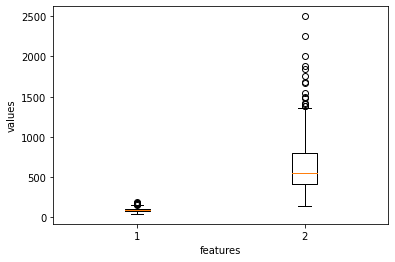

In [0]:
#   시각화
import matplotlib.pyplot as plt
plt.boxplot(x_train[:, [2,3] ]  )
plt.xlabel('features')
plt.ylabel('values')

plt.show()

In [0]:
#   전체 입력 데이터 셋을 표준화    - 1st. method
#       scikit-learn package의 StandardScaler 클래스 활용

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()       # 1) 표준화 객체 생성
scaler.fit(x)                   # 2) 매개변수로 전달한 데이터의 평균, 표준편차 계산(fit)
x_scaled = scaler.transform(x)  # 3) 실제 표준화 수행

x_scaled.shape

(569, 30)

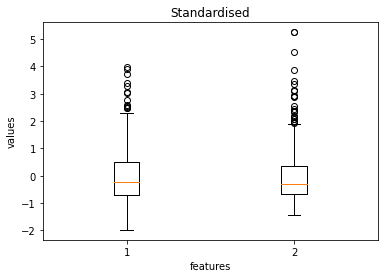

In [0]:
plt.boxplot(x_scaled[:, [2,3] ]  )
plt.title('Standardised')
plt.xlabel('features')
plt.ylabel('values')

plt.show()